## IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np

## READING DATA SET

In [6]:
Train =pd.read_excel('Data_Latih_BDC.xlsx')

## DATA PRE-PROCESSING

In [7]:
Train.shape

(4231, 6)

In [8]:
Train.isnull().sum()

id                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64

In [9]:
Train.head(10)

,id,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg
5,736,1,2020-06-17 00:00:00,event promo smartphone JNE 2020 spesial di bul...,"selamat siang teman teman fb ku semuanya🤩,cuma...",736.png
6,1161,1,2020-05-05 00:00:00,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,1161.png
7,1597,1,2020-03-24 00:00:00,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,1597.png
8,2098,1,2020-01-09 00:00:00,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",Polisi goblok. Bukanya cpet” d tolongin malah ...,2098.jpg
9,2226,1,2019-12-24 00:00:00,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...,2226.png


In [10]:
x = Train['judul']
y = Train['label']
y.shape

(4231,)

In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [13]:
aku = 'mengklasifikasi'
factory = StemmerFactory()
stemmer = factory.create_stemmer()
dia =stemmer.stem(aku)
print(dia)

klasifikasi


In [14]:
stop = StopWordRemoverFactory()
stop_factory = set(stop.get_stop_words())
to_remove = ['•', '!', '"', '#', '”', '“', '$', '%', '&', "'", '–', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '…']
stop_factory.update(('dengan','dlm','di','yang','ia','bahwa','oleh','yg','jadi','tidak','ini','dari','untuk','sudah','ada',
                'akan','dengan','bukan','tak','buat')) 
stop_factory.update(to_remove)
print('Number of stopwords:', len(stop_factory))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub('\[[^]]*\]', '', text)
    text = (" ").join([word for word in text.split() if not word in stop_factory])
    text = "".join([char for char in text if not char in to_remove])
    return text

s = Train['judul'].apply(clean_text)

Number of stopwords: 176


In [16]:
corpus = []
for i in range(0, len(Train)):
    review = re.sub('[^a-zA-Z]', ' ', s[i])
    reivew = review.lower()
    review = review.split()
    review = [word for word in review if word not in (stop_factory)]
    review = [stemmer.stem(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns
import itertools
import wordcloud
from wordcloud import WordCloud

In [19]:
corpus

['pakai masker sebab sakit legionnaires',
 'instruksi gubernur jateng tilang masker muka umum rp guna etilang via apps pikobar',
 'foto jim rohn jokowi presiden baik sejarah bangsa indonesia',
 'politik nyata pak jokowi hasil pulang triliun uang negara swiss',
 'foto kadrun kalo lihat foto panas dingin',
 'event promo smartphone jne spesial bulan juni',
 'siap diri baik kuasa negri',
 'foto presiden italia menang cukup lahan kubur an korban corona per hari',
 'kapolres timor tengah utara nusa tenggara timur beri klarifikasi kait video polisi diam korban celaka',
 'video polisi china aniaya wanita uighur leher cekik pake kaki',
 'akhir jokowi sedia undur diri',
 'info jalur rawan begal himbauan keluar malam kapolres cianjur',
 'dirut pt agung podomoro land cosmas batubara tinggal dunia',
 'sby telepon moeldoko suruh jokowi aku kalah',
 'foto anak rohingya siksa komunis',
 'orang cina punya ktp cilacap atas nama karsono',
 'fadli zon semua warga indonesia pilih prabowo pilpres usir indon

In [20]:
df= pd.DataFrame({'label':y, 'judul':corpus})

label
0     766
1    3465
Name: judul, dtype: int64


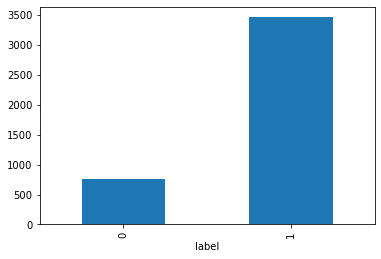

In [21]:
print(df.groupby(['label'])['judul'].count())
df.groupby(['label'])['judul'].count().plot(kind='bar')
plt.show()

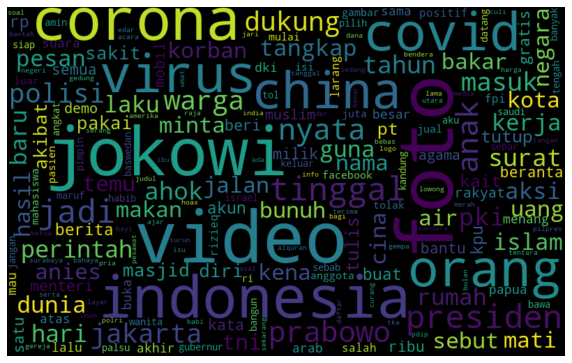

In [22]:
fake_data = df[df['label'] == 1]
all_words = ' '.join([word for word in fake_data.judul])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

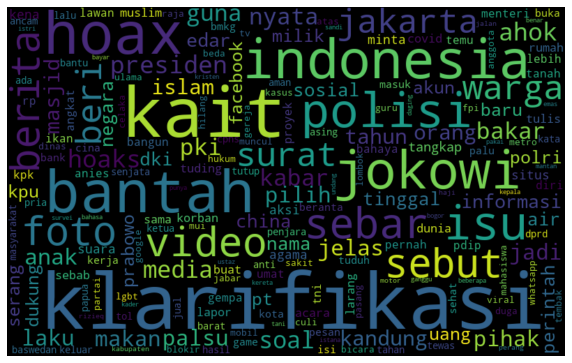

In [23]:
real_data = df[df['label'] == 0]
all_words = ' '.join([text for text in real_data.judul])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
from nltk import tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [25]:
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

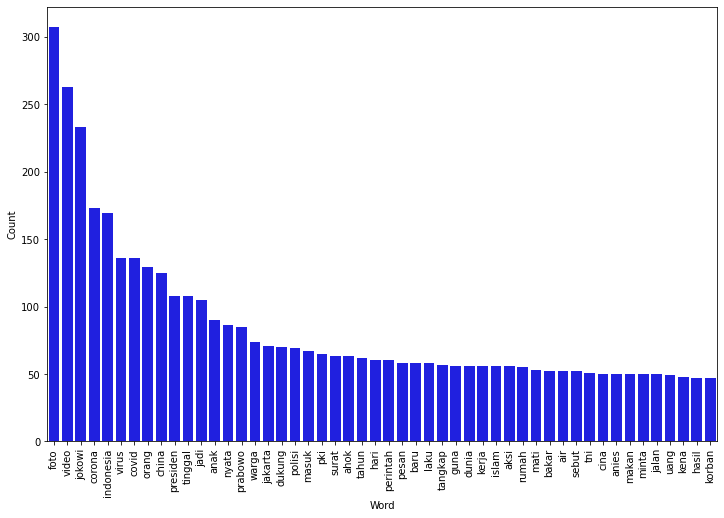

In [26]:
counter(df[df['label'] == 1], 'judul', 50)

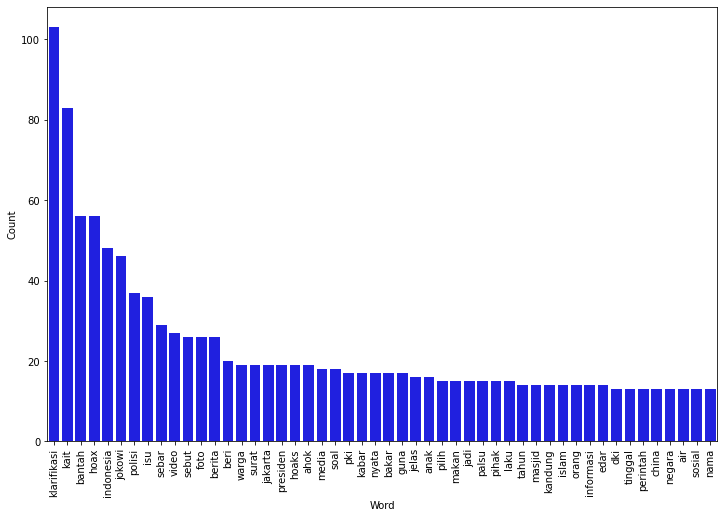

In [27]:
counter(df[df['label'] == 0], 'judul', 50)

In [32]:
c = fake_data['judul'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(c)
word_dist1 = nltk.FreqDist(words)
print (word_dist1)

rslt1 = pd.DataFrame(word_dist1.most_common(),
                    columns=['Word', 'Frequency'])
rslt1.head(50)

<FreqDist with 6342 samples and 25216 outcomes>


,Word,Frequency
0,foto,307
1,video,263
2,jokowi,233
3,corona,173
4,indonesia,169
5,virus,136
6,covid,136
7,orang,129
8,china,125
9,presiden,108


In [33]:
d = real_data['judul'].str.cat(sep=' ')
wordss = nltk.tokenize.word_tokenize(d)
word_dist2 = nltk.FreqDist(wordss)
print (word_dist2)

rslt2 = pd.DataFrame(word_dist2.most_common(),
                    columns=['Word', 'Frequency'])
rslt2.head(50)

<FreqDist with 2572 samples and 6019 outcomes>


,Word,Frequency
0,klarifikasi,103
1,kait,83
2,bantah,56
3,hoax,56
4,indonesia,48
5,jokowi,46
6,polisi,37
7,isu,36
8,sebar,29
9,video,27


## BUILDING MODELS

In [34]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

## Spiliting and Training

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(df['judul'], df.label, test_size=0.2, random_state=42)

## Logistic Regression

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [37]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction)*100,2)))

accuracy: 85.24%
f1_score: 91.8%


Confusion matrix, without normalization


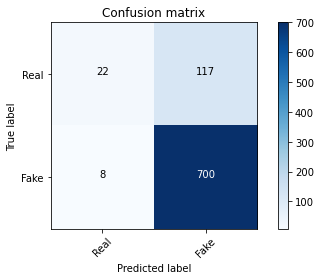

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction)*100,2)))

accuracy: 84.65%
f1_score: 91.28%


Confusion matrix, without normalization


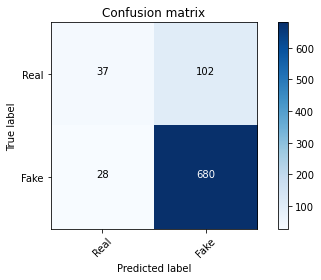

In [40]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction)*100,2)))

accuracy: 86.54%
f1_score: 92.39%


Confusion matrix, without normalization


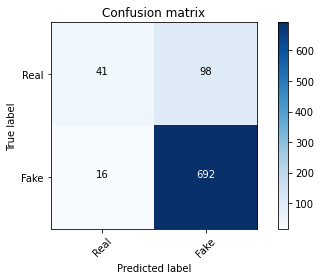

In [42]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [ ]:



print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction)*100,2)))

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## Test on data_test ##

## Read data_test

In [49]:
Test =pd.read_excel('Data_Uji_BDC.xlsx')
Test_id = Test['ID']

In [50]:
Test_id

0      238057
1      238158
2      238865
3      248298
4      255176
        ...  
465    206021
466    219874
467    222802
468    226020
469    232887
Name: ID, Length: 470, dtype: int64

## data_test Pre-processing

In [51]:
Test = Test.drop(['tanggal','ID','narasi','nama file gambar'], axis=1)

In [52]:
Test.head()

,judul
0,Narasi Tito Karnavian Berideologi Komunis Kare...
1,Anies: Seberat beratnya Pekerjaan Akan terasa ...
2,Hindu di india Melemparkan Patung Buatan Merek...
3,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...
4,Permohonan Kelonggaran Angsuran ke OJK


In [53]:
Test.isnull().sum()

judul    0
dtype: int64

In [54]:
Test.shape

(470, 1)

In [55]:
stop = StopWordRemoverFactory()
stop_factory = set(stop.get_stop_words())
to_remove = ['•', '!', '"', '#', '”', '“', '$', '%', '&', "'", '–', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '…']
stop_factory.update(('dengan','dlm','di','yang','ia','bahwa','oleh','yg','jadi','tidak','ini','dari','untuk','sudah','ada',
                'akan','dengan','bukan','tak','buat')) 
stop_factory.update(to_remove)
print('Number of stopwords:', len(stop_factory))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub('\[[^]]*\]', '', text)
    text = (" ").join([word for word in text.split() if not word in stop_factory])
    text = "".join([char for char in text if not char in to_remove])
    return text

d = Test['judul'].apply(clean_text)

Number of stopwords: 176


In [56]:
corpus_test = []
for i in range(0, len(Test)):
    review = re.sub('[^a-zA-Z]', ' ', d[i])
    reivew = review.lower()
    review = review.split()
    review = [word for word in review if word not in stop_factory]
    review = [stemmer.stem(word) for word in review]
    review = ' '.join(review)
    corpus_test.append(review)

In [57]:
corpus_test

['narasi tito karnavian ideologi komunis pernah sekolah partai komunis china beijing',
 'anies berat berat kerja asa ringan bila kerja',
 'hindu india lempar patung buat laut tolong corona',
 'rscm praktek sedot plug venasaluran darah',
 'mohon longgar angsur ojk',
 'aksi bem sejabotabek hari',
 'sinar kosmik bahaya radiasi',
 'pihak smkn beri klarifikasi perihal kabar viral pasang foto presiden joko widodo',
 'buat ktp orang gila ambisi kuasa',
 'daniel radcliffe positiv infeksi corona covid',
 'big data cyber security indonesia pasang',
 'rakyat jokowi jusuf kalla nyata cuma adegan depan kamera',
 'sms hadiah lazada birthday',
 'takbir larang kota bandung',
 'kota cirebon lockdown',
 'afi nihaya faradisa laku plagiat',
 'foto sinden',
 'tuding guna sprindik palsu fredrich yunadi kpk ikan klarifikasi',
 'edar soal cpns media sosial',
 'festival layanglayang kpubawaslu sosialisasi pilkada depok',
 'ponpes batabata pamekasan dukung khilafah ganti pancasila',
 'video jokowi tahu sebab ka

In [58]:
predict_test = model.predict(corpus_test)
print(predict_test)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1]


## Submission File

In [59]:
val = []
for i in predict_test:
    val.append(i)

In [60]:
submission = pd.DataFrame({'ID':Test_id, 'prediksi':val,'judul':corpus_test})
submission.head(100)

,ID,prediksi,judul
0,238057,1,narasi tito karnavian ideologi komunis pernah ...
1,238158,1,anies berat berat kerja asa ringan bila kerja
2,238865,1,hindu india lempar patung buat laut tolong corona
3,248298,1,rscm praktek sedot plug venasaluran darah
4,255176,1,mohon longgar angsur ojk
...,...,...,...
95,660294,1,astaghfirullah lanjur aku makan mie samyang
96,661533,1,viral uang nasabah raib bas juta bri beri tanggap
97,670954,1,ragu jokowi alumni ugm
98,687656,1,era jokowi ahok makin jamur psk asal cina jaka...


In [61]:
type(submission)

pandas.core.frame.DataFrame

In [62]:
submission.to_csv('RFresult4.csv',index=False)